In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #패키지 리소스(자원) 중 폰트 관련 모음
import matplotlib as mpl

In [134]:
# ================================================================================
# 함수 이름 : clean
# 함수 기능 : 행과 열 인덱스를 맞춤
# 변     수 : 파일을 지정해야하여 변수로 설정해야함
# ----------------------------------------------------------
def clean(file):
    # 1열은 필요없으므로 건너뛴 상태로 csv파일 부름
    F = pd.read_csv(file, skiprows = 1)       

    # 형변환
    F['특성별(1)'] = F['특성별(1)'].astype('category')
    F['특성별(2)'] = F['특성별(2)'].astype('category')

    # 멀티인덱스 설정
    F.set_index(['특성별(1)','특성별(2)'], inplace = True)

    # 정보 확인
    F.info()                

    return F


# ================================================================================


In [135]:
font_path =r'C:\Windows\Fonts\gulim.ttc'
#matplotlib 패키지에 한글폰트 설정
myfont = fm.FontProperties(fname= font_path).get_name()
mpl.rc('font', family = myfont)

In [136]:
multiple_adult = '../DATA/성인_사이버폭력_목격_경험_복수응답__20240119171036.csv'
situation_adult = '../DATA/성인_사이버폭력_목격_경험_여부_및_목격_상황_20240119171111.csv'
kind_adult = '../DATA/성인_사이버폭력_목격_경험_유형_수_20240119171016.csv'

multiple_adult = clean(multiple_adult)
situation_adult = clean(situation_adult)
kind_adult = clean(kind_adult)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 52 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사이버 언어폭력  52 non-null     float64
 1   사이버 명예훼손  52 non-null     float64
 2   사이버 스토킹   52 non-null     float64
 3   사이버 성폭력   52 non-null     float64
 4   신상정보 유출   52 non-null     float64
 5   사이버 따돌림   52 non-null     float64
 6   사이버 갈취    52 non-null     float64
 7   사이버 강요    52 non-null     float64
dtypes: float64(8)
memory usage: 6.7 KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 53 entries, ('특성별(1)', '특성별(2)') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   목격경험있음    53 non-null     object
 1   목격경험있음.1  53 non-null     object
 2   목격경험있음.2  53 non-null     object
 3   목격경험있음.3  53 non-null     object
 4   목격경험없음    53 non-null     object
dtypes: object(5)
memory u

In [137]:
# --------------------------------------------------------------------------
# 함수 이름 : select
# 매개 변수 : F (데이터 프레임 변수 이름), indexC (행 인덱스 이름)
# 함수 기능 : 데이터 프레임에서 해당 인덱스 열을 뽑아줌 (DataFrame 형식)
# --------------------------------------------------------------------------
def select(F, indexC):
        result = F.xs(indexC, level = 0)
        return result


In [138]:
#multiple_adult 복수응답
gender = select(multiple_adult, '성별')
age = select(multiple_adult, '연령별')
job = select(multiple_adult, '직업별')
internet_usage = select(multiple_adult, '인터넷 이용시간별')
school = select(multiple_adult, '학력별')


<Axes: xlabel='특성별(2)'>

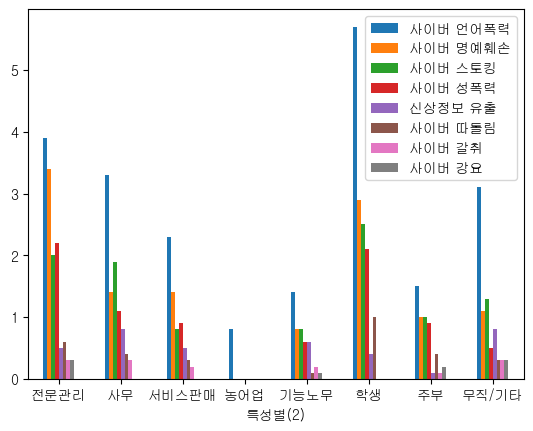

In [139]:
job.plot(kind = 'bar', rot = 0)

<Axes: xlabel='특성별(2)'>

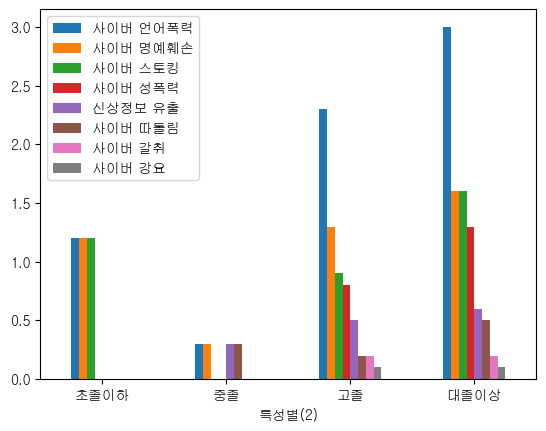

In [140]:
school.plot(kind = 'bar', rot = 0)

<Axes: xlabel='특성별(2)'>

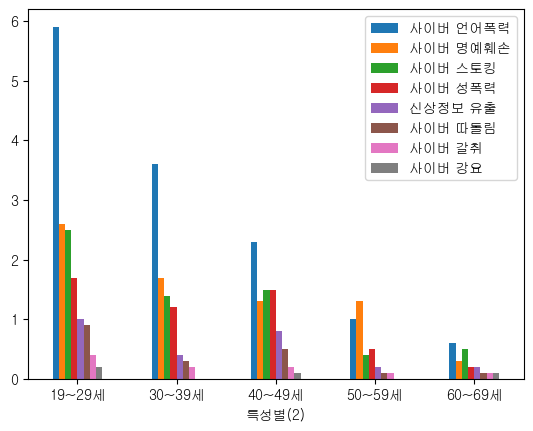

In [141]:
age.plot(kind = 'bar', rot = 0)


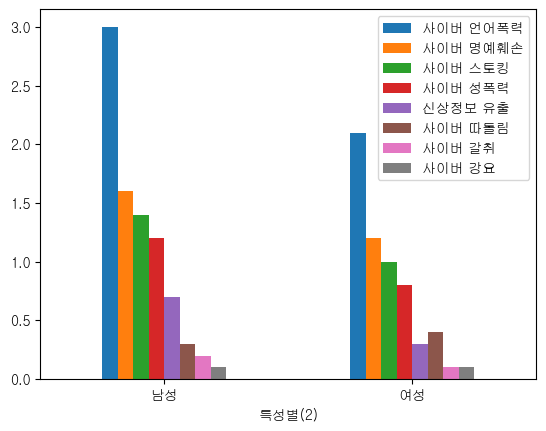

In [142]:
gender.plot(kind = 'bar', rot = 0)
plt.xlabel = ('성별')
plt.ylabel = ('응답%')
plt.title = ('복수응답')

In [143]:
#kind_adult 경험유형
age = select(kind_adult, '연령별')
job = select(kind_adult, '직업별')


<Axes: xlabel='특성별(2)'>

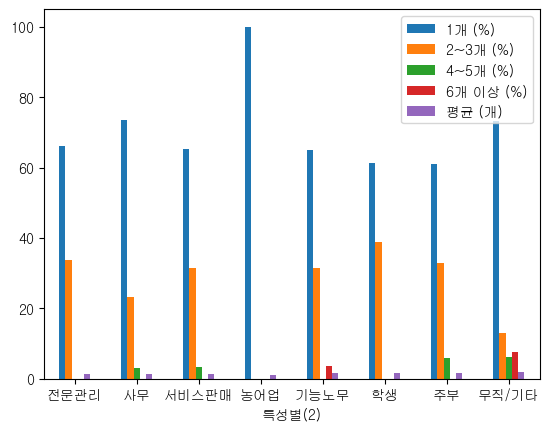

In [144]:
job.plot(kind = 'bar', rot = 0)

<Axes: xlabel='특성별(2)'>

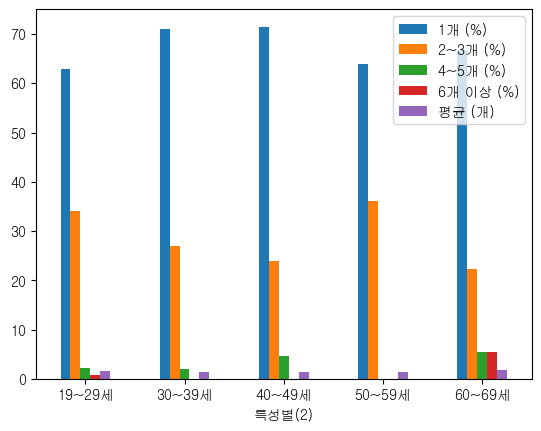

In [145]:
age.plot(kind = 'bar', rot = 0)

In [146]:
#situation_adult: 파이 차트, 경험여부/목격상황
age = select(situation_adult,'연령별')
job = select(situation_adult,'직업별')
edu = select(situation_adult,'사이버폭력 예방교육별')

In [149]:
age = age.astype('float64')
job = job.astype('float64')
edu = edu.astype('float64')

In [171]:
age

,목격경험있음,목격경험있음.1,목격경험있음.2,목격경험있음.3,목격경험없음
특성별(2),,,,,
19~29세,9.7,0.8,5.3,3.6,90.3
30~39세,6.4,0.6,3.7,2.0,93.6
40~49세,5.7,0.4,3.3,2.1,94.3
50~59세,2.4,0.2,1.6,0.6,97.6
60~69세,1.1,0.1,1.0,0.1,98.9


<Axes: ylabel='40~49세'>

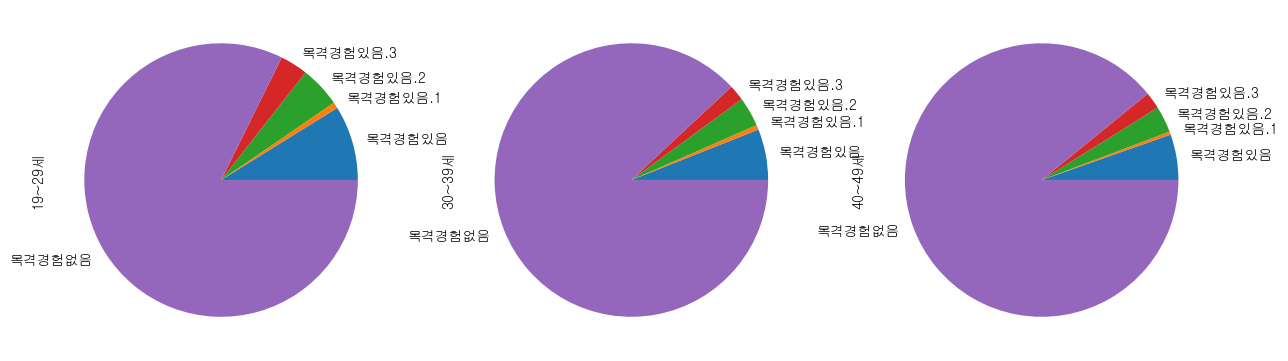

In [173]:
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
age.loc['19~29세'].plot(kind = 'pie')
plt.subplot(1,3,2)
age.loc['30~39세'].plot(kind = 'pie')
plt.subplot(1,3,3)
age.loc['40~49세'].plot(kind = 'pie')

<Axes: ylabel='경험 없음'>

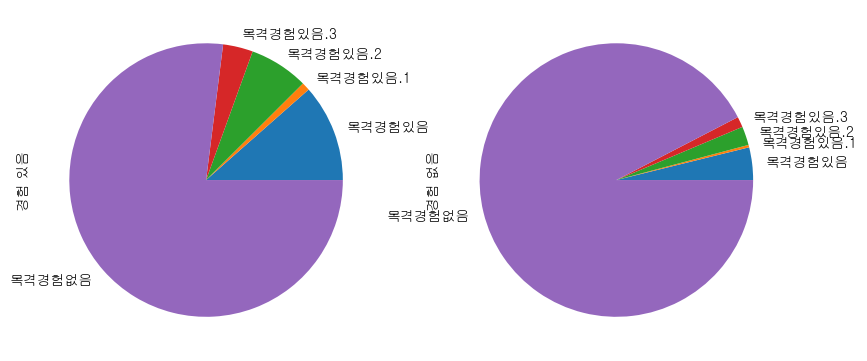

In [166]:
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
edu.loc['경험 있음'].plot(kind = 'pie')
plt.subplot(1,3,2)
edu.loc['경험 없음'].plot(kind = 'pie')

<Axes: ylabel='사무'>

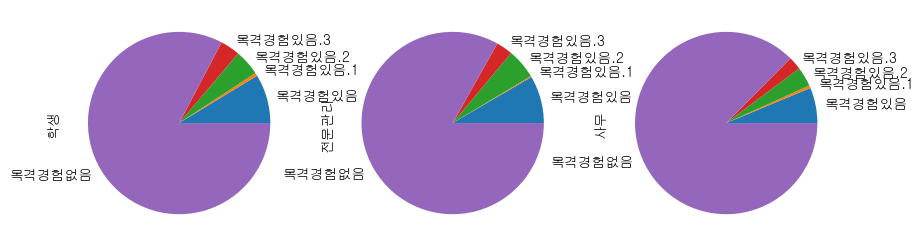

In [170]:
plt.figure(figsize = (10,12))
plt.subplot(1,3,1)
job.loc['학생'].plot(kind = 'pie')


plt.subplot(1,3,2)
job.loc['전문관리'].plot(kind = 'pie')


plt.subplot(1,3,3)
job.loc['사무'].plot(kind = 'pie')

<Axes: ylabel='전문관리'>

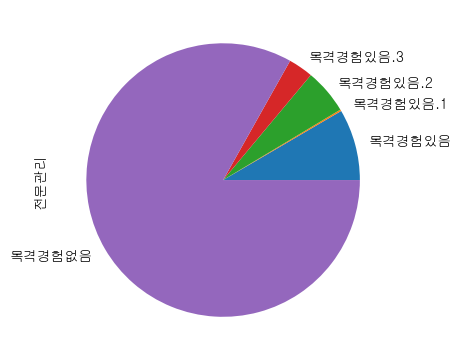

KeyError: '전문관리'